In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# Make sure we're in the right directory
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

from os.path import join
from pathlib import Path
from typing import Optional, Union, List, Sequence
import pytorch_lightning as pl
import numpy as np
import xarray as xr
import torch
import torch.nn as nn
from torch import Tensor
from matplotlib import pyplot as plt
from src.utilities.wandb_api import reload_checkpoint_from_wandb
from src.interface import get_predictions

In [15]:
# data_dir = Path("/global/cfs/cdirs/m3504/oisstv2-daily")
data_dir = Path("/Users/hailey/repos/convex-diffusion/data/processed-60x60-boxes-pixelwise-stats/")
wandb_id = '3kkx899f'

In [16]:
def reload_and_plot_preds(wandb_id: str, ar_steps=0):
    reloaded = reload_checkpoint_from_wandb(wandb_id,
                                            entity='convex-diffusion',
                                            override_key_value=[f'datamodule.data_dir={str(data_dir)}'])
    model = reloaded['model']
    datamodule = reloaded['datamodule']
    datamodule.update_predict_data(predict_slice=slice('2020-12-01', '2020-12-31'), boxes=[88]) # slice('2020-01-01', '2021-12-31')
    datamodule.setup('predict')
    dataloader = datamodule.predict_dataloader()
    results = get_predictions(model, dataloader, ar_steps)
    return results

In [17]:
results = reload_and_plot_preds(wandb_id, ar_steps=8)

/Users/hailey/repos/convex-diffusion/src/datamodules/torch_datasets.py:34: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:205.)
  tensors = [torch.from_numpy(ndarray).float() for ndarray in ndarrays]
100%|█████████████████████████████████████████████████████████████████████████████| 2/2 [00:22<00:00, 11.47s/it]


In [20]:
results_mlp = results

In [21]:
# results_mlp = reload_and_plot_preds('8319ujtg', ar_steps=8)

In [22]:
def plot_results(results, ar_step=0):
    fig, ax = plt.subplots(4, 4, figsize=(10, 10))
    col = 0
    tsize=results['preds'].shape[0]
    for i in range(8):
        k =  tsize// (i+1) - 1
        p = results['preds'][k, 0, ...]
        y = results['targets'][k, 0, ...]

        ax[i%4, col].imshow(p)
        ax[i%4, col+1].imshow(y)
        if i % 4 == 3:
            col+=2
    for a in ax.flat:
        a.set_xticklabels([])
        a.set_yticklabels([])
        
def plot_ar(results, ar_steps=5, show_targets=True):
    k=3
    nrows = 2 if show_targets else 1
    fig, axs = plt.subplots(nrows, ar_steps, figsize=(ar_steps*k, nrows*k), sharey=True, sharex=True)
    for i in range(ar_steps):
        pred_key = 'preds' if i == 0  else f'preds_ar_{i}'
        p = results[pred_key][0, 0, ...]
        y = results['targets'][i, 0, ...]
        if show_targets:
            axs[0, i].imshow(p)
            axs[1, i].imshow(y)
        else:
            axs[i].imshow(p)


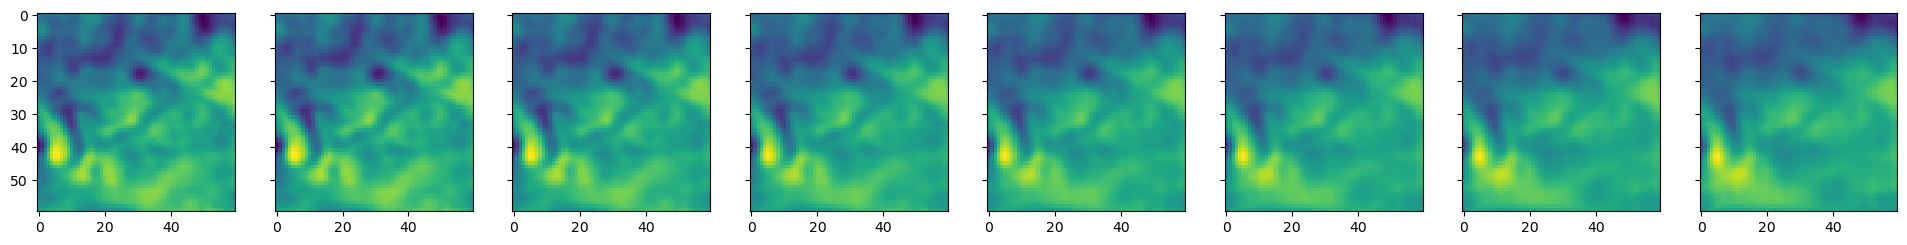

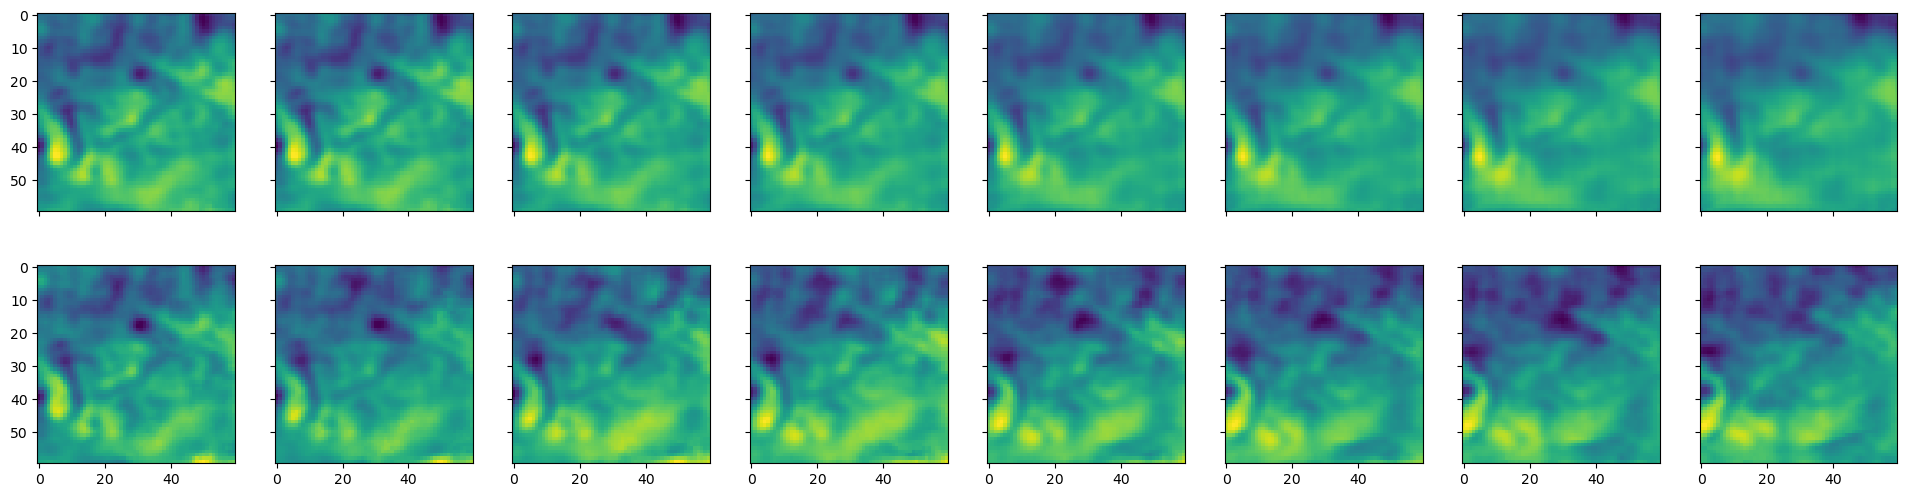

In [23]:
plot_ar(results_mlp, ar_steps=8, show_targets=False)
plot_ar(results, ar_steps=8)

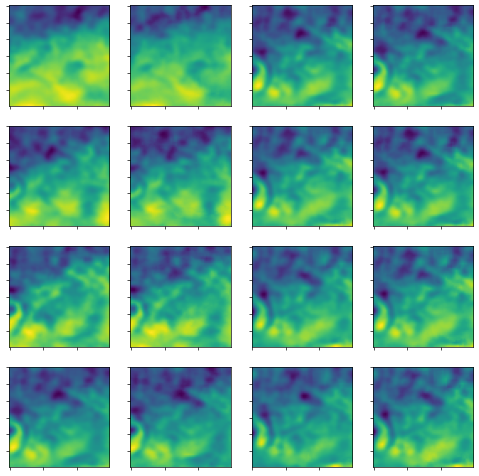

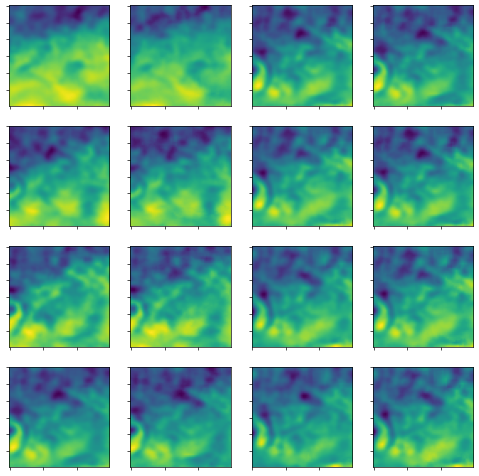

In [24]:
#plt.rcParams['figure.figsize'] = [40, 15]  # general matplotlib parameters
plt.rcParams['figure.dpi'] = 60 
plot_results(results)
plot_results(results_mlp)


In [25]:
def plot_results(results, ar_step=0):
    fig, ax = plt.subplots(4, 4, figsize=(10, 10))
    col = 0
    tsize=results['preds'].shape[0]
    for i in range(8):
        k =  tsize// (i+1) - 1
        p = results['preds'][k, 0, ...]
        y = results['targets'][k, 0, ...]

        ax[i%4, col].imshow(p)
        ax[i%4, col+1].imshow(y)
        if i % 4 == 3:
            col+=2
    for a in ax.flat:
        a.set_xticklabels([])
        a.set_yticklabels([])
        
def plot_ar(results, ar_steps=5, show_targets=True):
    k=3
    nrows = 2 if show_targets else 1
    fig, axs = plt.subplots(nrows, ar_steps, figsize=(ar_steps*k, nrows*k), sharey=True, sharex=True)
    for i in range(ar_steps):
        pred_key = 'preds' if i == 0  else f'preds_ar_{i}'
        p = results[pred_key][0, 0, ...]
        y = results['targets'][i, 0, ...]
        if show_targets:
            axs[0, i].imshow(p)
            axs[1, i].imshow(y)
        else:
            axs[i].imshow(p)


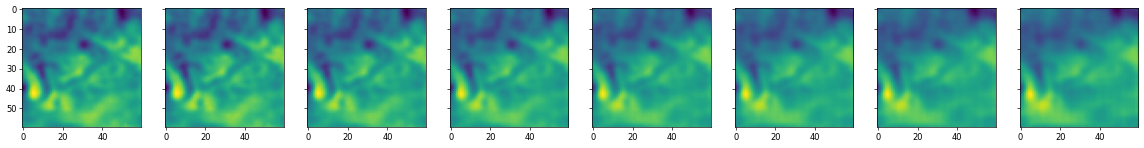

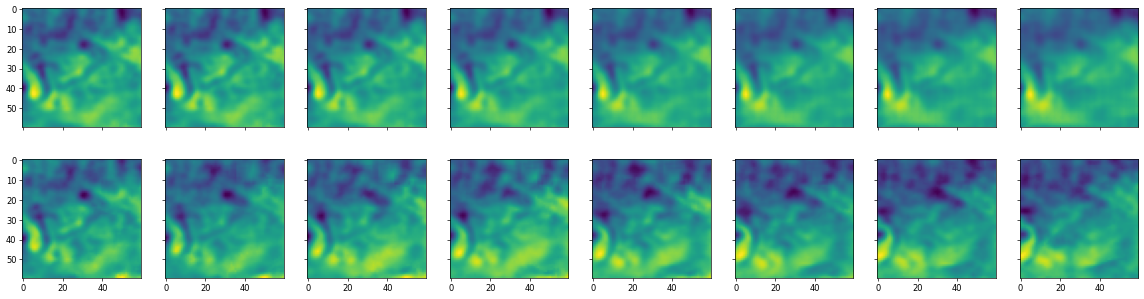

In [26]:
plot_ar(results_mlp, ar_steps=8, show_targets=False)
plot_ar(results, ar_steps=8)

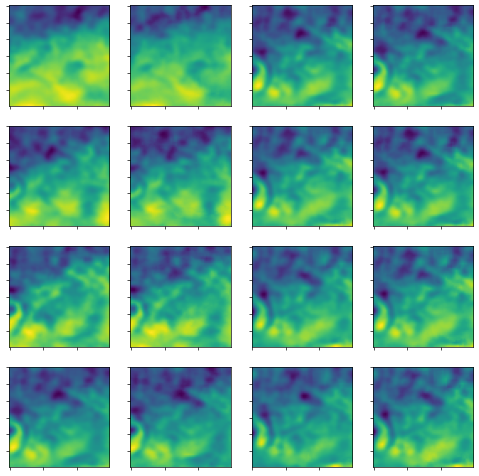

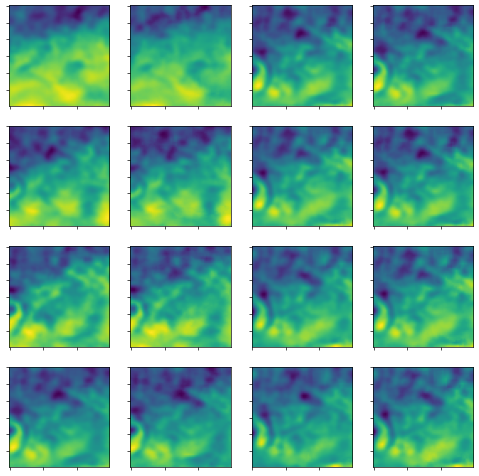

In [27]:
#plt.rcParams['figure.figsize'] = [40, 15]  # general matplotlib parameters
plt.rcParams['figure.dpi'] = 60 
plot_results(results)
plot_results(results_mlp)
